# DSCI 521: Data Analysis and Interpretation <br> Phase 2 - Exploratory Data Analysis and Machine Learning

# Team
*   Austin Eversole (ae588@drexel.edu)
*   Greg Savage (gs824@drexel.edu)
*   Robert Thompson (rt598@drexel.edu)

# Importing Libraries

In [579]:
# Data Manipulation and Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from calendar import month_name

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# For Results
import csv


# Mount Google Drive


In [580]:
ca_fires_data_file_path = "../data/California_Fire_Incidents.csv"
image_file_path = "../images/"


# Loading the California Fires Data

In [581]:
df = pd.read_csv(ca_fires_data_file_path)
pd.set_option('display.max_columns', None)
df.head(5)


,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,55,NaN,NaN,NaN,2013-09-06T18:30:00Z,NaN,False,True,NaN,NaN,NaN,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,NaN,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,19,NaN,NaN,NaN,2013-06-08T18:30:00Z,NaN,False,True,NaN,NaN,NaN,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,NaN,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,33,NaN,NaN,NaN,2013-07-30T18:00:00Z,NaN,False,True,NaN,NaN,NaN,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,NaN,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,31,NaN,NaN,NaN,2013-08-30T08:00:00Z,NaN,False,True,NaN,NaN,NaN,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,NaN,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,56,47.0,8.0,117.0,2013-05-11T06:30:00Z,NaN,False,True,NaN,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2167.0,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


## Show Data Summary
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.**bold text**

In [582]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

## Number of Rows & Columns


In [583]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Number of Rows: 1636
Number of Columns: 40


## Show Data Statistics

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [584]:
df.describe()


,AcresBurned,AirTankers,ArchiveYear,CrewsInvolved,Dozers,Engines,Fatalities,Helicopters,Injuries,Latitude,Longitude,PercentContained,PersonnelInvolved,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,WaterTenders
count,1633.000000,28.000000,1636.000000,171.000000,123.000000,191.000000,21.000000,84.000000,120.000000,1636.000000,1636.000000,1633.0,204.000000,67.000000,175.000000,0.0,30.000000,146.000000
mean,4589.443968,4.071429,2016.608802,11.561404,7.585366,23.565445,8.619048,5.357143,3.500000,37.203975,-108.082642,100.0,328.553922,67.970149,271.788571,NaN,522.800000,7.815068
std,27266.337722,6.399818,1.845340,14.455633,14.028616,41.004424,18.529642,7.265437,3.806231,135.401380,37.006927,0.0,521.138789,155.771975,1557.255963,NaN,739.586856,12.719251
min,0.000000,0.000000,2013.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-120.258000,-124.196290,100.0,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,35.000000,2.000000,2015.000000,2.500000,1.000000,5.000000,1.000000,1.000000,1.000000,34.165891,-121.768358,100.0,55.000000,1.000000,1.000000,NaN,0.000000,2.000000
50%,100.000000,2.000000,2017.000000,6.000000,2.000000,11.000000,3.000000,2.000000,3.000000,37.104065,-120.461560,100.0,151.500000,6.000000,7.000000,NaN,45.000000,4.000000
75%,422.000000,4.000000,2018.000000,13.500000,5.000000,24.000000,6.000000,5.000000,4.000000,39.086808,-117.474073,100.0,350.000000,49.500000,41.500000,NaN,1043.750000,6.000000
max,410203.000000,27.000000,2019.000000,82.000000,76.000000,256.000000,85.000000,29.000000,26.000000,5487.000000,118.908200,100.0,3100.000000,783.000000,18804.000000,NaN,2600.000000,79.000000


## Replace NaN with 0
NaN values in the data set look to correlate to a value of 0. For example, the ***StructuresDestroyed*** columns has numerical values but also has NaN values. One could assume the NaN would be set in the data to say that 0 structure or no structure were destroyed in a given fire record.

In [585]:
df.fillna(0, inplace=True)
df.head(5)


,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,0.0,2013,True,/incidents/2013/8/17/rim-fire/,0,0,Tuolumne,55,0.0,0.0,0.0,2013-09-06T18:30:00Z,0.0,False,True,0,0.0,0.0,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,0.0,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,0.0,0.0,0.0,0.0,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,0.0
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,0.0,2013,True,/incidents/2013/5/30/powerhouse-fire/,0,0,Los Angeles,19,0.0,0.0,0.0,2013-06-08T18:30:00Z,0.0,False,True,0,0.0,0.0,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,0.0,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,0.0,0.0,0.0,0.0,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,0.0
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,0.0,2013,True,/incidents/2013/7/15/mountain-fire/,0,0,Riverside,33,0.0,0.0,0.0,2013-07-30T18:00:00Z,0.0,False,True,0,0.0,0.0,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,0.0,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,0.0,0.0,0.0,0.0,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,0.0
3,27440.0,False,Tahoe National Forest,0.0,2013,False,/incidents/2013/8/10/american-fire/,0,0,Placer,31,0.0,0.0,0.0,2013-08-30T08:00:00Z,0.0,False,True,0,0.0,0.0,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,0.0,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,0.0,0.0,0.0,0.0,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,0.0
4,24251.0,False,Ventura County Fire/CAL FIRE,0.0,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,0,Ventura,56,47.0,8.0,117.0,2013-05-11T06:30:00Z,0.0,False,True,0,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2167.0,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,0.0,0.0,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


## Convert Dates to Pandas DateTime Objects and Remove Outlier Dates

In [586]:
# Convert Fire Start and Extinguished from Object to Pandas DateTime
df['Started'] = pd.to_datetime(df['Started'])
df['Extinguished'] = pd.to_datetime(df['Extinguished'])

df['YearStarted'] = df['Started'].dt.year
df['MonthStarted'] = df['Started'].dt.month

df['FireDuration'] = df['Extinguished'] - df['Started']
df['FireDurationDays'] = df['FireDuration'].dt.days
df.head(5)


,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,YearStarted,MonthStarted,FireDuration,FireDurationDays
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,0.0,2013,True,/incidents/2013/8/17/rim-fire/,0,0,Tuolumne,55,0.0,0.0,0.0,2013-09-06 18:30:00+00:00,0.0,False,True,0,0.0,0.0,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,0.0,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17 15:25:00+00:00,Finalized,0.0,0.0,0.0,0.0,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,0.0,2013,8,20 days 03:05:00,20
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,0.0,2013,True,/incidents/2013/5/30/powerhouse-fire/,0,0,Los Angeles,19,0.0,0.0,0.0,2013-06-08 18:30:00+00:00,0.0,False,True,0,0.0,0.0,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,0.0,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30 15:28:00+00:00,Finalized,0.0,0.0,0.0,0.0,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,0.0,2013,5,9 days 03:02:00,9
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,0.0,2013,True,/incidents/2013/7/15/mountain-fire/,0,0,Riverside,33,0.0,0.0,0.0,2013-07-30 18:00:00+00:00,0.0,False,True,0,0.0,0.0,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,0.0,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15 13:43:00+00:00,Finalized,0.0,0.0,0.0,0.0,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,0.0,2013,7,15 days 04:17:00,15
3,27440.0,False,Tahoe National Forest,0.0,2013,False,/incidents/2013/8/10/american-fire/,0,0,Placer,31,0.0,0.0,0.0,2013-08-30 08:00:00+00:00,0.0,False,True,0,0.0,0.0,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,0.0,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10 16:30:00+00:00,Finalized,0.0,0.0,0.0,0.0,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,0.0,2013,8,19 days 15:30:00,19
4,24251.0,False,Ventura County Fire/CAL FIRE,0.0,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,0,Ventura,56,47.0,8.0,117.0,2013-05-11 06:30:00+00:00,0.0,False,True,0,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2167.0,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02 07:01:00+00:00,Finalized,6.0,10.0,0.0,0.0,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0,2013,5,8 days 23:29:00,8


## Remove Fire Durations that are Negative

In [587]:
df = df[df['FireDurationDays'] >= 0]
df = df[df['YearStarted'] > 2000]
df.head(5)


,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,Final,FuelType,Helicopters,Injuries,Latitude,Location,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,YearStarted,MonthStarted,FireDuration,FireDurationDays
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,0.0,2013,True,/incidents/2013/8/17/rim-fire/,0,0,Tuolumne,55,0.0,0.0,0.0,2013-09-06 18:30:00+00:00,0.0,False,True,0,0.0,0.0,37.857000,3 miles east of Groveland along Hwy 120,-120.086000,False,Rim Fire,100.0,0.0,True,The Rim Fire was east of Groveland along Highw...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17 15:25:00+00:00,Finalized,0.0,0.0,0.0,0.0,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,0.0,2013,8,20 days 03:05:00,20
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,0.0,2013,True,/incidents/2013/5/30/powerhouse-fire/,0,0,Los Angeles,19,0.0,0.0,0.0,2013-06-08 18:30:00+00:00,0.0,False,True,0,0.0,0.0,34.585595,Angeles National Forest,-118.423176,False,Powerhouse Fire,100.0,0.0,True,The Powerhouse Fire burned in May and June 201...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30 15:28:00+00:00,Finalized,0.0,0.0,0.0,0.0,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,0.0,2013,5,9 days 03:02:00,9
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,0.0,2013,True,/incidents/2013/7/15/mountain-fire/,0,0,Riverside,33,0.0,0.0,0.0,2013-07-30 18:00:00+00:00,0.0,False,True,0,0.0,0.0,33.709500,Hwy 243 & Hwy 74 near Mountain Center,-116.728850,False,Mountain Fire,100.0,0.0,True,The Mountain Fire burned in July 2013 off High...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15 13:43:00+00:00,Finalized,0.0,0.0,0.0,0.0,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,0.0,2013,7,15 days 04:17:00,15
3,27440.0,False,Tahoe National Forest,0.0,2013,False,/incidents/2013/8/10/american-fire/,0,0,Placer,31,0.0,0.0,0.0,2013-08-30 08:00:00+00:00,0.0,False,True,0,0.0,0.0,39.120000,"Deadwood Ridge, northeast of Foresthill",-120.650000,False,American Fire,100.0,0.0,True,The American Fire burned in August 2013 off De...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10 16:30:00+00:00,Finalized,0.0,0.0,0.0,0.0,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,0.0,2013,8,19 days 15:30:00,19
4,24251.0,False,Ventura County Fire/CAL FIRE,0.0,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,0,Ventura,56,47.0,8.0,117.0,2013-05-11 06:30:00+00:00,0.0,False,True,0,11.0,10.0,0.000000,Southbound Highway 101 at Camarillo Springs Ro...,0.000000,True,Springs Fire,100.0,2167.0,True,"The Springs Fire burned in May 2013, Southboun...","Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02 07:01:00+00:00,Finalized,6.0,10.0,0.0,0.0,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0,2013,5,8 days 23:29:00,8


# Exploratory Data Analysis

## Min/Max/Average Duration of a Fire

In [588]:
min = df.FireDurationDays.min()
max = df.FireDurationDays.max()
avg = df.FireDurationDays.mean()

print("Minimum Duration of Fire in Days:", min)
print("Maximum Duration of Fire in Days:", max)
print("Average Duration of Fire in Days:", avg)


Minimum Duration of Fire in Days: 0
Maximum Duration of Fire in Days: 672
Average Duration of Fire in Days: 84.86489980607628


In [589]:
unique_years = df.YearStarted.unique().tolist()
unique_month_nums = df.MonthStarted.unique().tolist()

months = list(month_name)
acres_burned_per_year = list()

for year in unique_years:
    current_year = df.loc[df['YearStarted'] == year]
    acres_burned_per_year.append(current_year['AcresBurned'].sum())

for month_num in unique_month_nums:
    df.loc[df["MonthStarted"] == month_num,
           "MonthNameStarted"] = month_name[month_num]


## Number of Fires Per Year

2013    158
2014    115
2015    149
2016    182
2017    437
2018    315
2019    191
Name: YearStarted, dtype: int64


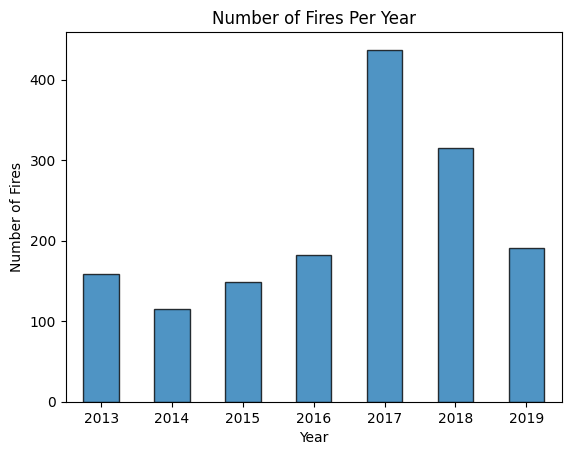

In [590]:
num_of_fires = df['YearStarted'].value_counts()
num_of_fires = num_of_fires.sort_index()
print(num_of_fires)
figure = num_of_fires.plot(kind="bar", title="Number of Fires Per Year", xlabel="Year",
                           ylabel="Number of Fires", rot=0, alpha=0.785, edgecolor="0").get_figure()
figure.savefig(image_file_path + 'number_of_fires_per_year.png')


California was plagued the most by fires in 2017 and 2018 with a total of 437 and 315 respectively.

## Number of Major Fires Per Year

YearStarted
2013    44
2014    40
2015    52
2016    49
2017    93
2018    74
2019    24
Name: MajorIncident, dtype: int64


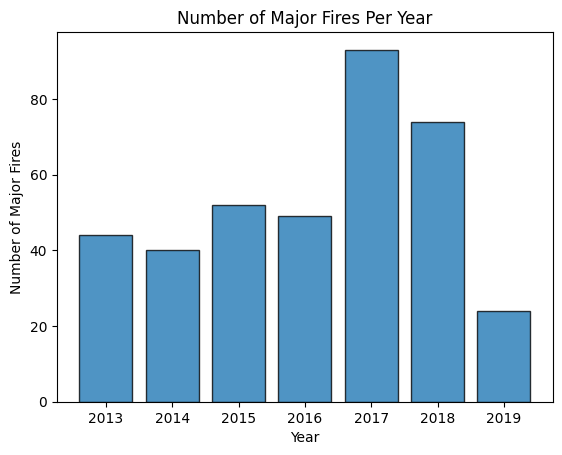

In [591]:
major_fires = df[df['MajorIncident'] == True].groupby(['YearStarted'])
major_fires_count = major_fires['MajorIncident'].count()
print(major_fires_count)

plt.bar(major_fires_count.index, major_fires_count, alpha=0.785, edgecolor="0")

plt.title('Number of Major Fires Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Major Fires')
plt.savefig(image_file_path + 'number_of_major_fires_per_year.png')
plt.show()


## Number of Fires and Major Fires

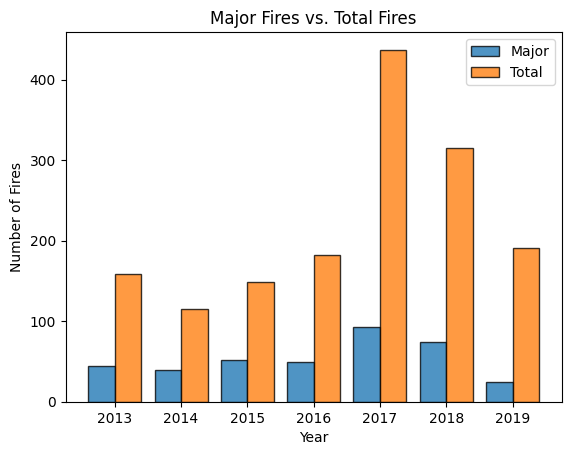

In [592]:
major_fires = df[df['MajorIncident'] == True].groupby(['YearStarted'])
major_fires_count = major_fires['MajorIncident'].count()

num_of_fires = df['YearStarted'].value_counts()
num_of_fires = num_of_fires.sort_index()

x_axis = np.arange(len(unique_years))
width = 0.2

fig, ax = plt.subplots()

plt.bar(x_axis - width, major_fires_count, 0.4,
        alpha=0.785, edgecolor="0", label="Major")
plt.bar(x_axis + width, num_of_fires, 0.4,
        alpha=0.785, edgecolor="0", label="Total")

plt.xticks(x_axis, unique_years)
plt.title("Major Fires vs. Total Fires")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.legend()
fig.savefig(image_file_path + 'major_fires_and_total_fires.png')
plt.show()


## Months with the Most Fires

January       11
February      10
March          6
April         35
May          139
June         313
July         394
August       265
September    187
October      129
November      39
December      19
Name: MonthNameStarted, dtype: int64


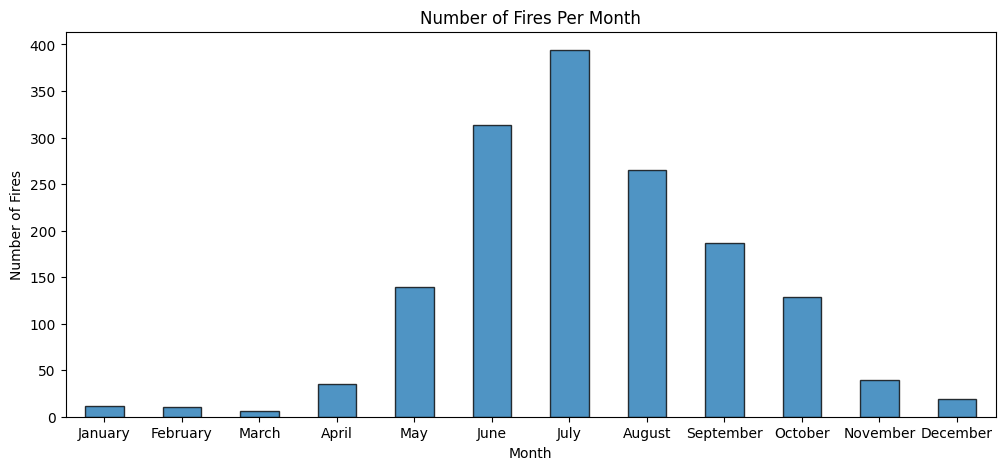

In [593]:
num_of_fires = df['MonthNameStarted'].value_counts()
num_of_fires = num_of_fires.sort_index(key=lambda x: pd.Categorical(x,
                                                                    categories=months, ordered=True))
print(num_of_fires)
figure = num_of_fires.plot(kind="bar", title="Number of Fires Per Month", xlabel="Month",
                           ylabel="Number of Fires", figsize=(12, 5), rot=0, alpha=0.785, edgecolor="0").get_figure()
figure.savefig(image_file_path+'number_of_fires_per_month.png')


From 2013-2019, the summer months brought the most fires to California with July being the highest with 394 reported fires. June and August both had reported 313 and 265 respectively.

## Counties Most Effected By Fires

Riverside          138
San Diego           85
Butte               64
San Luis Obispo     62
Shasta              61
Kern                60
Fresno              55
Siskiyou            53
San Bernardino      50
Tehama              48
Name: Counties, dtype: int64


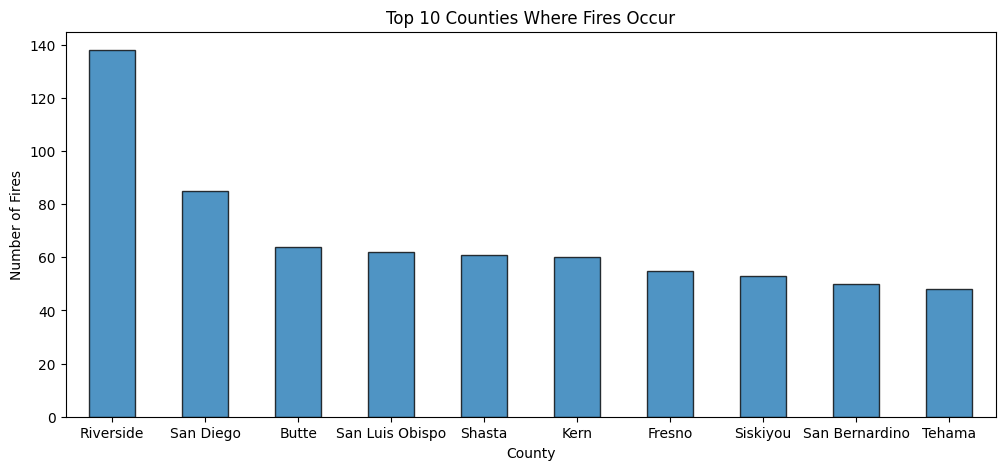

In [594]:
num_of_fires = df['Counties'].value_counts().head(10)
print(num_of_fires)

top_fires_counties = num_of_fires.index.tolist()

figure = num_of_fires.plot(kind="bar", title="Top 10 Counties Where Fires Occur", xlabel="County",
                           ylabel="Number of Fires", figsize=(12, 5), rot=0, alpha=0.785, edgecolor="0").get_figure()
figure.savefig(image_file_path + 'top_counties_with_fires.png')


Over the span of seven years, Riverside has the most reported fire incidents. This is the highest number of incidents across the fifty-eight counties (https://sgf.senate.ca.gov/sites/sgf.senate.ca.gov/files/county_facts_2016.pdf) in California. The next county with the highest number of reported fires is San Diego.

## Acres Burned By Year

/var/folders/40/8f7jh9511p94jsck1hjljksw0000gn/T/ipykernel_6878/1914251973.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


[Text(0, 0.0, '0'),
 Text(0, 500000.0, '500000'),
 Text(0, 1000000.0, '1000000'),
 Text(0, 1500000.0, '1500000'),
 Text(0, 2000000.0, '2000000'),
 Text(0, 2500000.0, '2500000'),
 Text(0, 3000000.0, '3000000'),
 Text(0, 3500000.0, '3500000'),
 Text(0, 4000000.0, '4000000')]

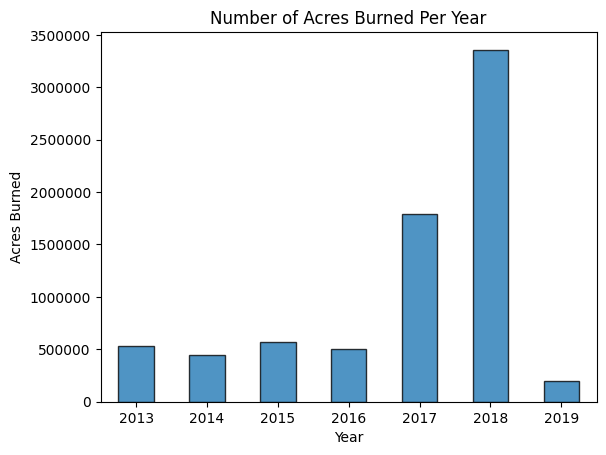

In [595]:
acres_burned = df[['YearStarted', 'AcresBurned']].groupby('YearStarted').sum()
acres_burned = acres_burned.sort_index()

figure = acres_burned.plot(kind="bar", title="Number of Acres Burned Per Year", xlabel="Year",
                           ylabel="Acres Burned", rot=0, legend=False, alpha=0.785, edgecolor="0").get_figure()
figure.savefig(image_file_path + 'acres_burned_per_year.png')

# Get rid of scientific notation
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


Given the data set is made up of fires reported between 2013 and 2019, of the seven years, 2018 had the most number of acres land burned with over 3 million.

## Correlation Between Fires in Counties and Acres Burned

               AcresBurned
Counties                  
Lake              582704.0
Mendocino         512572.0
Trinity           481048.0
Colusa            459316.0
Shasta            448377.0
Ventura           428213.0
Glenn             413138.0
Siskiyou          365833.0
Santa Barbara     362516.0
Tuolumne          299132.0


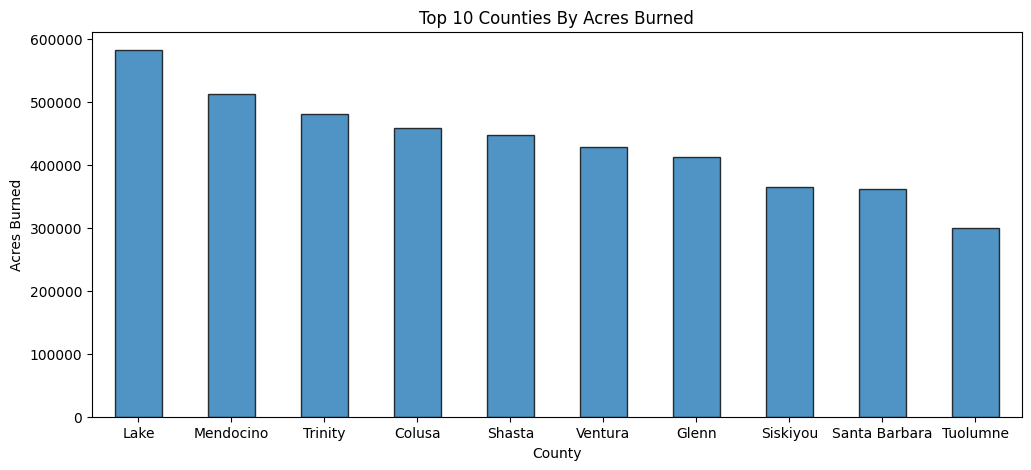

In [596]:
acres_burned = df[['Counties', 'AcresBurned']].groupby('Counties').sum()
acres_burned = acres_burned.sort_values(
    by='AcresBurned', ascending=False).head(10)
print(acres_burned)

top_acres_counties = acres_burned.index.tolist()

figure = acres_burned.plot(kind="bar", title="Top 10 Counties By Acres Burned", xlabel="County",
                           ylabel="Acres Burned", figsize=(12, 5), rot=0, legend=False, alpha=0.785, edgecolor="0").get_figure()
figure.savefig(image_file_path + 'top_counties_with_acres_burned.png')


In [597]:
print("Top Fires in Counties")
top_fires_counties = sorted(top_fires_counties)
print(top_fires_counties)
print()
print("Top Acres Burned in Counties")
top_acres_counties = sorted(top_acres_counties)
print(top_acres_counties)
print()
print("Top Fires vs. Acres in Counties")
common_list = set(top_fires_counties).intersection(top_acres_counties)
print(sorted(common_list))


Top Fires in Counties
['Butte', 'Fresno', 'Kern', 'Riverside', 'San Bernardino', 'San Diego', 'San Luis Obispo', 'Shasta', 'Siskiyou', 'Tehama']

Top Acres Burned in Counties
['Colusa', 'Glenn', 'Lake', 'Mendocino', 'Santa Barbara', 'Shasta', 'Siskiyou', 'Trinity', 'Tuolumne', 'Ventura']

Top Fires vs. Acres in Counties
['Shasta', 'Siskiyou']


There is a small correlation between the number of fires reported in California counties and the number of acres reported to be burned in a given county. Between the top fifteen, five counties were common between the two data frames: Butte, Fresno, Laka, Shasta, and Siskiyou.


*   **Riverside** county that had the most number of fires reported did not come to be within the top fifteen counties with the most acres burned.
*   **Lake** county had the most number of acres burned but was #11 on the reported number of fires burned
*   **Mendocino** county that had the second highest number of acres burned did not come to be within the top fifteen counties with the most reported fires







## Years with Most Fatalities

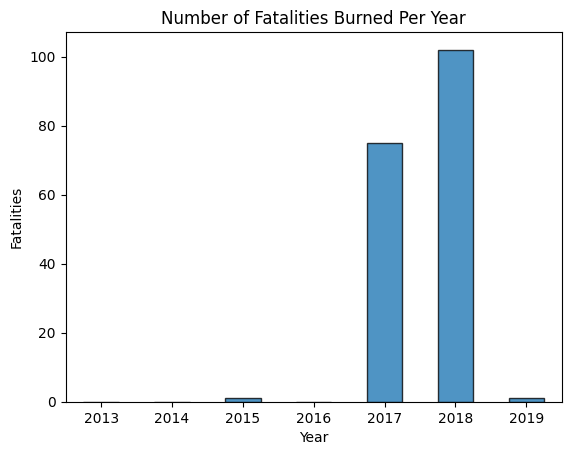

In [598]:
fatalities = df[['Fatalities', 'YearStarted']].groupby('YearStarted').sum()
fatalities = fatalities.sort_index()

figure = fatalities.plot(kind="bar", title="Number of Fatalities Burned Per Year", xlabel="Year",
                         ylabel="Fatalities", rot=0, legend=False, alpha=0.785, edgecolor="0").get_figure()
figure.savefig(image_file_path + 'number_of_fatalities_per_year.png')


2017 and 2018 plagued California with the most fatalities with the highest number of fatalities occuring in 2018. This unfortuanetly aligns with the number of fires that occured in 2017 and 2018. The rest of the years in 2013-2019 saw, thankfully, very little to no fatalities.

## Number of Fires and Acres Burned

AcresBurned Sum: YearStarted
2013     527584.0
2014     448670.0
2015     574179.0
2016     505499.0
2017    1793903.0
2018    3358004.0
2019     200492.0
Name: AcresBurned, dtype: float64
AcresBurned Count: YearStarted
2013    158
2014    115
2015    149
2016    182
2017    437
2018    315
2019    191
Name: AcresBurned, dtype: int64


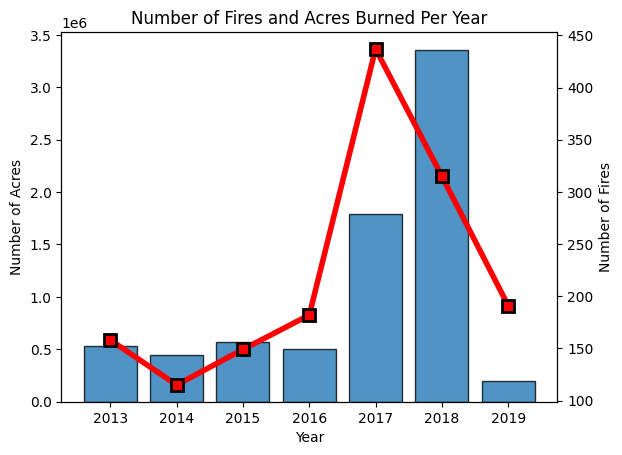

<Figure size 1000x500 with 0 Axes>

In [599]:
fire_sum = df.groupby(['YearStarted']).sum()
fire_count = df.groupby(['YearStarted']).count()

fig, ax = plt.subplots()

print("AcresBurned Sum:", fire_sum['AcresBurned'])
print("AcresBurned Count:", fire_count['AcresBurned'])

# Plot Total Sum of Acres Burned as a Bar Chart
plt.bar(unique_years, fire_sum['AcresBurned'], alpha=0.785, edgecolor="0")

# Plot Total Number of Events
ax2 = ax.twinx()
plt.plot(unique_years, fire_count['AcresBurned'],
         "s-r", lw=4, ms=8, mew=2, mec='k')

ax.set_title("Number of Fires and Acres Burned Per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Acres")
ax2.set_ylabel("Number of Fires")
plt.figure(figsize=(10, 5))
fig.savefig(image_file_path + 'number_of_fires_and_acres_burned.png')
plt.show()


## Correlation Between Fire Duration and Acres Burned

AcresBurned Sum: YearStarted
2013     527584.0
2014     448670.0
2015     574179.0
2016     505499.0
2017    1793903.0
2018    3358004.0
2019     200492.0
Name: AcresBurned, dtype: float64
FireDurationDays Sum: YearStarted
2013      457
2014     1126
2015      803
2016     2102
2017    72264
2018    53620
2019      914
Name: FireDurationDays, dtype: int64


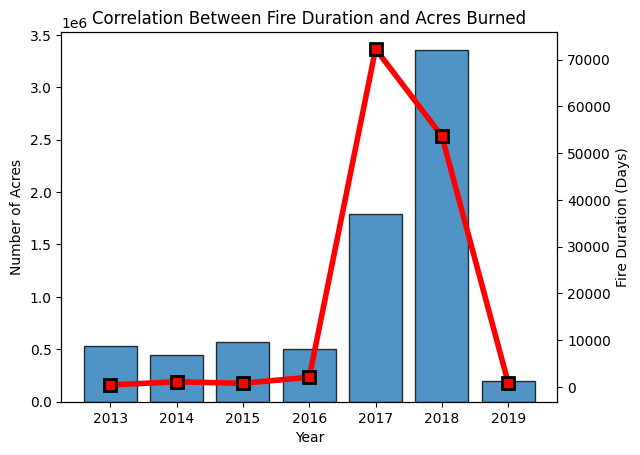

<Figure size 1000x500 with 0 Axes>

In [600]:
fire_sum = df.groupby(['YearStarted']).sum()
fire_count = df.groupby(['YearStarted']).count()

fig, ax = plt.subplots()

print("AcresBurned Sum:", fire_sum['AcresBurned'])
print("FireDurationDays Sum:", fire_sum['FireDurationDays'])

# Plot Total Sum of Acres Burned as a Bar Chart
plt.bar(unique_years, fire_sum['AcresBurned'], alpha=0.785, edgecolor="0")

# Plot Sum of Fire Duration in Days as a Line Plot
ax2 = ax.twinx()
plt.plot(unique_years, fire_sum['FireDurationDays'],
         "s-r", lw=4, ms=8, mew=2, mec='k')

ax.set_title("Correlation Between Fire Duration and Acres Burned")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Acres")
ax2.set_ylabel("Fire Duration (Days)")
plt.figure(figsize=(10, 5))
fig.savefig(image_file_path +
            'correlation_between_fire_duration_and_acres_burned.png')
plt.show()


# Machine Learning: Classification and Prediction

## Helpful CSV Function

In [601]:
model_results = []


def write_results_to_csv(data, filename):
    header = ['model', 'target', 'data', 'accuracy',
              'recall', 'precision', 'f1-score']

    with open(filename, 'w', encoding='UTF8', newline='') as f:
        writer = csv.DictWriter(f, fieldnames=header)
        writer.writeheader()
        writer.writerows(data)


## Pre-Process Data

In [602]:
# Convert our True/False boolean values to integers
df["MajorIncident"] = df["MajorIncident"].astype(int)
target_names = ['Not Major Incident', 'Major Incident']

# Features and Labels
# These columns are all damage related and are my best judgement on what should be used to classify a major fire incident
feature_columns = ['AcresBurned', 'Fatalities', 'Injuries', 'StructuresDamaged',
                               'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened']

X = df[feature_columns]
y = df.MajorIncident

# Split our Data into Training and Test
# Note: Set shuffle to False for reproducability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=False)

# TODO: Determine if we want to z-score our data
# Standardize Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Classifying a Major Fire Incident

### Logistic Regression Classifier

In [603]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Model Evaluation - Train Data

In [604]:
y_pred_train = lr.predict(X_train)

lr_train_classification_report = classification_report(
    y_train, y_pred_train, target_names=target_names, output_dict=True)
lr_train_accuracy = float("{:.2f}".format(
    accuracy_score(y_train, y_pred_train)))

lr_train_non_major_results = {
    "model": "Logistic Regression",
    "target": "Not a Major Incident (0)",
    "data": "Train",
    "accuracy": lr_train_accuracy,
    "recall": float("{:.2f}".format(lr_train_classification_report["Not Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(lr_train_classification_report["Not Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(lr_train_classification_report["Not Major Incident"]["f1-score"]))
}

lr_train_major_results = {
    "model": "Logistic Regression",
    "target": "Major Incident (1)",
    "data": "Train",
    "accuracy": lr_train_accuracy,
    "recall": float("{:.2f}".format(lr_train_classification_report["Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(lr_train_classification_report["Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(lr_train_classification_report["Major Incident"]["f1-score"]))
}

model_results.append(lr_train_non_major_results)
model_results.append(lr_train_major_results)

print("Logistic Regression Train Data - Classification Report")
print(classification_report(y_train, y_pred_train, target_names=target_names))

print("Logistic Regression Train Data - Accuracy")
print(lr_train_accuracy)
print("")
print("Logistic Regression Train - Confusion Matrix")
print(confusion_matrix(y_train, y_pred_train))


Logistic Regression Train Data - Classification Report
                    precision    recall  f1-score   support

Not Major Incident       0.81      1.00      0.89       835
    Major Incident       0.99      0.38      0.55       325

          accuracy                           0.83      1160
         macro avg       0.90      0.69      0.72      1160
      weighted avg       0.86      0.83      0.80      1160

Logistic Regression Train Data - Accuracy
0.83

Logistic Regression Train - Confusion Matrix
[[834   1]
 [201 124]]


### Model Evaluation - Test Data

In [605]:
y_pred_test = lr.predict(X_test)

lr_test_classification_report = classification_report(
    y_test, y_pred_test, target_names=target_names, output_dict=True)
lr_test_accuracy = float("{:.2f}".format(accuracy_score(y_test, y_pred_test)))

lr_test_non_major_results = {
    "model": "Logistic Regression",
    "target": "Not a Major Incident (0)",
    "data": "Test",
    "accuracy": lr_test_accuracy,
    "recall": float("{:.2f}".format(lr_test_classification_report["Not Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(lr_test_classification_report["Not Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(lr_test_classification_report["Not Major Incident"]["f1-score"]))
}

lr_test_major_results = {
    "model": "Logistic Regression",
    "target": "Major Incident (1)",
    "data": "Test",
    "accuracy": lr_test_accuracy,
    "recall": float("{:.2f}".format(lr_test_classification_report["Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(lr_test_classification_report["Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(lr_test_classification_report["Major Incident"]["f1-score"]))
}

model_results.append(lr_test_non_major_results)
model_results.append(lr_test_major_results)

print("Logistic Regression Test Data - Classification Report")
print(classification_report(y_test, y_pred_test, target_names=target_names))

print("Logistic Regression Test Data - Accuracy")
print(lr_test_accuracy)
print("")
print("Logistic Regression Test - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_test))


Logistic Regression Test Data - Classification Report
                    precision    recall  f1-score   support

Not Major Incident       0.89      1.00      0.94       336
    Major Incident       1.00      0.22      0.35        51

          accuracy                           0.90       387
         macro avg       0.95      0.61      0.65       387
      weighted avg       0.91      0.90      0.87       387

Logistic Regression Test Data - Accuracy
0.9

Logistic Regression Test - Confusion Matrix
[[336   0]
 [ 40  11]]


### Decision Tree Classifier

In [606]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

### Model Evaluation - Train Data

In [607]:
y_pred_train = dt.predict(X_train)

dt_train_classification_report = classification_report(
    y_train, y_pred_train, target_names=target_names, output_dict=True)
dt_train_accuracy = float("{:.2f}".format(
    accuracy_score(y_train, y_pred_train)))

dt_train_non_major_results = {
    "model": "Decision Tree",
    "target": "Not a Major Incident (0)",
    "data": "Train",
    "accuracy": dt_train_accuracy,
    "recall": float("{:.2f}".format(dt_train_classification_report["Not Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(dt_train_classification_report["Not Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(dt_train_classification_report["Not Major Incident"]["f1-score"]))
}

dt_train_major_results = {
    "model": "Decision Tree",
    "target": "Major Incident (1)",
    "data": "Train",
    "accuracy": dt_train_accuracy,
    "recall": float("{:.2f}".format(dt_train_classification_report["Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(dt_train_classification_report["Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(dt_train_classification_report["Major Incident"]["f1-score"]))
}

model_results.append(dt_train_non_major_results)
model_results.append(dt_train_major_results)

print("Decision Tree Train Data - Classification Report")
print(classification_report(y_train, y_pred_train, target_names=target_names))

print("Decision Tree Train Data - Accuracy")
print(dt_train_accuracy)
print("")
print("Decision Tree Train - Confusion Matrix")
print(confusion_matrix(y_train, y_pred_train))


Decision Tree Train Data - Classification Report
                    precision    recall  f1-score   support

Not Major Incident       0.91      1.00      0.95       835
    Major Incident       0.99      0.75      0.85       325

          accuracy                           0.93      1160
         macro avg       0.95      0.87      0.90      1160
      weighted avg       0.93      0.93      0.92      1160

Decision Tree Train Data - Accuracy
0.93

Decision Tree Train - Confusion Matrix
[[832   3]
 [ 82 243]]


### Model Evaluation - Test Data

In [608]:
y_pred_test = dt.predict(X_test)

dt_test_classification_report = classification_report(
    y_test, y_pred_test, target_names=target_names, output_dict=True)
dt_test_accuracy = float("{:.2f}".format(accuracy_score(y_test, y_pred_test)))

dt_test_non_major_results = {
    "model": "Decision Tree",
    "target": "Not a Major Incident (0)",
    "data": "Test",
    "accuracy": dt_test_accuracy,
    "recall": float("{:.2f}".format(dt_test_classification_report["Not Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(dt_test_classification_report["Not Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(dt_test_classification_report["Not Major Incident"]["f1-score"]))
}

dt_test_major_results = {
    "model": "Decision Tree",
    "target": "Major Incident (1)",
    "data": "Test",
    "accuracy": dt_test_accuracy,
    "recall": float("{:.2f}".format(dt_test_classification_report["Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(dt_test_classification_report["Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(dt_test_classification_report["Major Incident"]["f1-score"]))
}

model_results.append(dt_test_non_major_results)
model_results.append(dt_test_major_results)

print("Decision Tree Test Data - Classification Report")
print(classification_report(y_test, y_pred_test, target_names=target_names))

print("Decision Tree Test Data - Accuracy")
print(dt_test_accuracy)
print("")
print("Decision Tree Test - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_test))


Decision Tree Test Data - Classification Report
                    precision    recall  f1-score   support

Not Major Incident       0.93      0.93      0.93       336
    Major Incident       0.54      0.51      0.53        51

          accuracy                           0.88       387
         macro avg       0.73      0.72      0.73       387
      weighted avg       0.88      0.88      0.88       387

Decision Tree Test Data - Accuracy
0.88

Decision Tree Test - Confusion Matrix
[[314  22]
 [ 25  26]]


### Random Forest Classifier

In [609]:
rf = RandomForestClassifier(criterion="entropy")
rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy')

### Model Evaluation - Train Data

In [610]:
y_pred_train = rf.predict(X_train)

rf_train_classification_report = classification_report(
    y_train, y_pred_train, target_names=target_names, output_dict=True)
rf_train_accuracy = float("{:.2f}".format(
    accuracy_score(y_train, y_pred_train)))

rf_train_non_major_results = {
    "model": "Random Forest",
    "target": "Not a Major Incident (0)",
    "data": "Train",
    "accuracy": rf_train_accuracy,
    "recall": float("{:.2f}".format(rf_train_classification_report["Not Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(rf_train_classification_report["Not Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(rf_train_classification_report["Not Major Incident"]["f1-score"]))
}

rf_train_major_results = {
    "model": "Random Forest",
    "target": "Major Incident (1)",
    "data": "Train",
    "accuracy": rf_train_accuracy,
    "recall": float("{:.2f}".format(rf_train_classification_report["Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(rf_train_classification_report["Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(rf_train_classification_report["Major Incident"]["f1-score"]))
}

model_results.append(rf_train_non_major_results)
model_results.append(rf_train_major_results)

print("Random Forest Train Data - Classification Report")
print(classification_report(y_train, y_pred_train, target_names=target_names))

print("Random Forest Train Data - Accuracy")
print(rf_train_accuracy)
print("")
print("Random Forest Train - Confusion Matrix")
print(confusion_matrix(y_train, y_pred_train))


Random Forest Train Data - Classification Report
                    precision    recall  f1-score   support

Not Major Incident       0.91      1.00      0.95       835
    Major Incident       0.98      0.75      0.85       325

          accuracy                           0.93      1160
         macro avg       0.95      0.87      0.90      1160
      weighted avg       0.93      0.93      0.92      1160

Random Forest Train Data - Accuracy
0.93

Random Forest Train - Confusion Matrix
[[831   4]
 [ 81 244]]


### Model Evaluation - Test Data

In [611]:
y_pred_test = rf.predict(X_test)

rf_test_classification_report = classification_report(
    y_test, y_pred_test, target_names=target_names, output_dict=True)
rf_test_accuracy = float("{:.2f}".format(accuracy_score(y_test, y_pred_test)))

rf_test_non_major_results = {
    "model": "Random Forest",
    "target": "Not a Major Incident (0)",
    "data": "Test",
    "accuracy": rf_test_accuracy,
    "recall": float("{:.2f}".format(rf_test_classification_report["Not Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(rf_test_classification_report["Not Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(rf_test_classification_report["Not Major Incident"]["f1-score"]))
}

rf_test_major_results = {
    "model": "Random Forest",
    "target": "Major Incident (1)",
    "data": "Test",
    "accuracy": rf_test_accuracy,
    "recall": float("{:.2f}".format(rf_test_classification_report["Major Incident"]["recall"])),
    "precision": float("{:.2f}".format(rf_test_classification_report["Major Incident"]["precision"])),
    "f1-score": float("{:.2f}".format(rf_test_classification_report["Major Incident"]["f1-score"]))
}

model_results.append(rf_test_non_major_results)
model_results.append(rf_test_major_results)

print("Random Forest Test Data - Classification Report")
print(classification_report(y_test, y_pred_test, target_names=target_names))

print("Random Forest Test Data - Accuracy")
print(rf_test_accuracy)
print("")
print("Random Forest Test - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_test))


Random Forest Test Data - Classification Report
                    precision    recall  f1-score   support

Not Major Incident       0.93      0.94      0.93       336
    Major Incident       0.56      0.53      0.55        51

          accuracy                           0.88       387
         macro avg       0.75      0.73      0.74       387
      weighted avg       0.88      0.88      0.88       387

Random Forest Test Data - Accuracy
0.88

Random Forest Test - Confusion Matrix
[[315  21]
 [ 24  27]]


### Write Results to CSV

In [612]:
write_results_to_csv(
    model_results, "major-fire-incident-classifier-results.csv")


## Predicting the Location of a Fire Incident